<a href="https://colab.research.google.com/github/cheonghf/ML-P4-03/blob/main/V2_Project_SourceCode_P4_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load CSV, Classify Data and Re-arrange Data

In [12]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset ID
dataset_id = "d_3c55210de27fcccda2ed0c63fdd2b352"

# API URL for the dataset
dataset_url = f"https://data.gov.sg/api/action/datastore_search?resource_id={dataset_id}&limit=5000"

# Request data from the API
response = requests.get(dataset_url)
response.raise_for_status()  # Ensure the request was successful

# Convert response to JSON
data = response.json()

# Extract records
if 'result' in data and 'records' in data['result']:
    df_ges1 = pd.DataFrame(data['result']['records'])
    df_ges1 = df_ges1.drop(columns=['_id'], errors='ignore')
    df_ges2 = df_ges1.copy() #df_ges2 will be the DataFrame we will be manipulating
    print("DataFrame ges 1 (R , C):", df_ges1.shape)  # Print shape to verify
    print("DataFrame ges 2 (R , C):", df_ges2.shape)  # Print shape to verify
else:
    print("No records found in the dataset.")

# dataset_1 = 'https://raw.githubusercontent.com/cheonghf/ML-P4-03/refs/heads/main/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv'
# df_ges1 = pd.read_csv(dataset_1)
# https://data.gov.sg/datasets/d_3c55210de27fcccda2ed0c63fdd2b352/view?dataExplorerPage=2

DataFrame ges 1 (R , C): (1262, 12)
DataFrame ges 2 (R , C): (1262, 12)


In [13]:
# Define clusters based on degree names
def classify_degree(degree):
    engineering_keywords = ['Engineering', 'Material Science', 'Mechanical', 'Electrical', 'Civil', 'Aerospace', 'Bioengineering']
    it_keywords = ['Computing', 'Computer Science', 'Information Systems', 'Software', 'Cybersecurity', 'Data Science']
    science_keywords = ['Science', 'Physics', 'Mathematics', 'Chemistry', 'Biological', 'Pharmacy', 'Life Sciences']
    business_keywords = ['Business', 'Finance', 'Accountancy', 'Economics', 'Management', 'Marketing']
    arts_keywords = ['Arts', 'Design', 'Music', 'Theatre', 'Performing', 'Linguistics', 'Philosophy', 'History', 'Literature']

    degree_lower = degree.lower()

    if any(keyword.lower() in degree_lower for keyword in engineering_keywords):
        return 'Engineering'
    elif any(keyword.lower() in degree_lower for keyword in it_keywords):
        return 'Information Technology'
    elif any(keyword.lower() in degree_lower for keyword in science_keywords):
        return 'Science'
    elif any(keyword.lower() in degree_lower for keyword in business_keywords):
        return 'Business'
    elif any(keyword.lower() in degree_lower for keyword in arts_keywords):
        return 'Arts'
    else:
        return 'Others'

# Apply classification to the dataset
df_ges2['degree_cluster'] = df_ges2['degree'].apply(classify_degree)
print("Updated DataFrame ges 2 (R , C):",df_ges2.shape)
print("")
print("DataType of DataFrame ges 2:")
print(df_ges2.dtypes)

Updated DataFrame ges 2 (R , C): (1262, 13)

DataType of DataFrame ges 2:
year                         object
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
degree_cluster               object
dtype: object


In [14]:
columns_to_convert = [
    "employment_rate_overall", "employment_rate_ft_perm",
    "basic_monthly_mean", "basic_monthly_median",
    "gross_monthly_mean", "gross_monthly_median",
    "gross_mthly_25_percentile", "gross_mthly_75_percentile"
]

for column in columns_to_convert:
    # Replace commas or other problematic characters if needed
    df_ges2[column] = df_ges2[column].astype(str).str.replace(',', '')

    # Remove leading/trailing whitespace
    df_ges2[column] = df_ges2[column].str.strip()

    # Convert to numeric
    df_ges2[column] = pd.to_numeric(df_ges1[column], errors='coerce')

# Check if conversion worked
print("Reconfirm DataFrame ges 2 (R , C):", df_ges2.shape)
print("")
print("Updated DataType of DataFrame ges 2:")
print(df_ges2.dtypes)

Reconfirm DataFrame ges 2 (R , C): (1262, 13)

Updated DataType of DataFrame ges 2:
year                          object
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
degree_cluster                object
dtype: object


In [15]:
# Grouping by year, university, and degree classification while removing unnecessary columns
df_ges2 = df_ges2.drop(columns=['school', 'degree']).groupby(['year', 'degree_cluster', 'university', ]).mean().reset_index()

# Check if grouping worked
print("Updated DataFrame ges 2 (R , C):", df_ges2.shape)
print("")
print("Reconfirm DataType of DataFrame ges 2:")
print(df_ges2.dtypes)

Updated DataFrame ges 2 (R , C): (237, 11)

Reconfirm DataType of DataFrame ges 2:
year                          object
degree_cluster                object
university                    object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object


#Re-Check for Null Values in DataFrame, Replace str 'Na' with Null and Remove Null Values

In [16]:
# Copy ges1 DataFrame into another DataFrame
df_ges2_clean = df_ges2[:]

print("DataFrame ges 2 (R , C):", df_ges2.shape)  # Print shape to verify
print("DataFrame ges 2 CLEAN (R , C):", df_ges2_clean.shape)  # Print shape to verify
print("")
print("Check for Null: BEFORE Replacing Potential na strings with Null values")
df_ges2_clean.isnull().sum(axis=0)

DataFrame ges 2 (R , C): (237, 11)
DataFrame ges 2 CLEAN (R , C): (237, 11)

Check for Null: BEFORE Replacing Potential na strings with Null values


,0
year,0
degree_cluster,0
university,0
employment_rate_overall,3
employment_rate_ft_perm,3
basic_monthly_mean,3
basic_monthly_median,3
gross_monthly_mean,3
gross_monthly_median,3
gross_mthly_25_percentile,3


In [17]:
# Replace the string 'na' with actual NaN (np.nan)
df_ges2_clean.replace('na', np.nan, inplace=True)

# Count NaN values in each column
na_counts = df_ges2_clean.isna().sum()

print("DataFrame ges 2 CLEAN (R , C):", df_ges2_clean.shape)  # Print shape to verify
print("")
print("Check for Null: AFTER Replacing Potential na strings with Null values")
print(na_counts)

DataFrame ges 2 CLEAN (R , C): (237, 11)

Check for Null: AFTER Replacing Potential na strings with Null values
year                         0
degree_cluster               0
university                   0
employment_rate_overall      3
employment_rate_ft_perm      3
basic_monthly_mean           3
basic_monthly_median         3
gross_monthly_mean           3
gross_monthly_median         3
gross_mthly_25_percentile    3
gross_mthly_75_percentile    3
dtype: int64


In [18]:
# Remove rows with any NaN values
df_ges2_clean = df_ges2_clean.dropna()

# Check if Null Cleaning worked
print("Final Cleaned DataFrame ges 2 (R , C):", df_ges2_clean.shape)
print("")
print("Final Cleaned DataType of DataFrame ges 2:")
print(df_ges2_clean.isnull().sum(axis=0))

Final Cleaned DataFrame ges 2 (R , C): (234, 11)

Final Cleaned DataType of DataFrame ges 2:
year                         0
degree_cluster               0
university                   0
employment_rate_overall      0
employment_rate_ft_perm      0
basic_monthly_mean           0
basic_monthly_median         0
gross_monthly_mean           0
gross_monthly_median         0
gross_mthly_25_percentile    0
gross_mthly_75_percentile    0
dtype: int64


#Preprocessing the Data

 # Identify Numerical and Categorical Variables

*   categorical_cols: These are categorical variables that need encoding.
*   numerical_cols: These will be standardized for better model performance.
*   target_col: This is what the model will predict.

In [19]:
df_ges3 = df_ges2_clean.copy()
print("DataFrame ges 2 CLEAN (R , C):", df_ges2_clean.shape)  # Print shape to verify
print("DataFrame ges 3 (R , C):", df_ges3.shape)  # Print shape to verify

# Identify categorical and numerical columns
categorical_cols = ['degree_cluster', 'university']
numerical_cols = ['year', 'employment_rate_overall', 'employment_rate_ft_perm']

# Define the target variable
target_col = 'gross_monthly_median'

DataFrame ges 2 CLEAN (R , C): (234, 11)
DataFrame ges 3 (R , C): (234, 11)


 One-Hot Encode Categorical Variables

In [20]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False) # Drop first to avoid multicollinearity
encoded_categorical = encoder.fit_transform(df_ges3[categorical_cols])

# Convert encoded features into a DataFrame
df_encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

Standardise Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_ges3[numerical_cols])

# Convert scaled features into a DataFrame
df_scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_cols)


Combine Preprocessed Features

In [22]:
# Concatenate numerical and categorical features
X = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)

# Define the target variable
y = df_ges3[target_col]

# Split Data into Training and Test Sets

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

# Initialise Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict salaries on the test set
y_pred = model.predict(X_test)

Evaluate Model Performance

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)   # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)    # Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R-squared score

mae, mse, r2

(224.49056169300982, 95489.93951810405, 0.7981855895435028)

#OLD: Making Sense of the Data

Encoding Categorical Variables (One-Hot Encoding)

*   Machine learning models cannot work with categorical data directly, so we must convert degree_cluster and university into numerical values.
*   Label Encoding (Assigns numbers to each category, useful for ordinal data).
*   One-Hot Encoding (Creates separate binary columns, better for categorical data).






In [ ]:
# df_ges2_clean.to_csv("my_data.csv", index=False) #Download as CSV

df_ges3 = df_ges2_clean.copy()
print("DataFrame ges 2 CLEAN (R , C):", df_ges2_clean.shape)  # Print shape to verify
print("DataFrame ges 3 (R , C):", df_ges3.shape)  # Print shape to verify

# Convert categorical variables to numerical
df_ges3 = pd.get_dummies(df_ges3, columns=['degree_cluster', 'university'], drop_first=True)
print("DataFrame ges 3 (R , C):", df_ges3.shape)  # Print shape to verify


DataFrame ges 2 CLEAN (R , C): (234, 11)
DataFrame ges 3 (R , C): (234, 11)
DataFrame ges 3 (R , C): (234, 19)


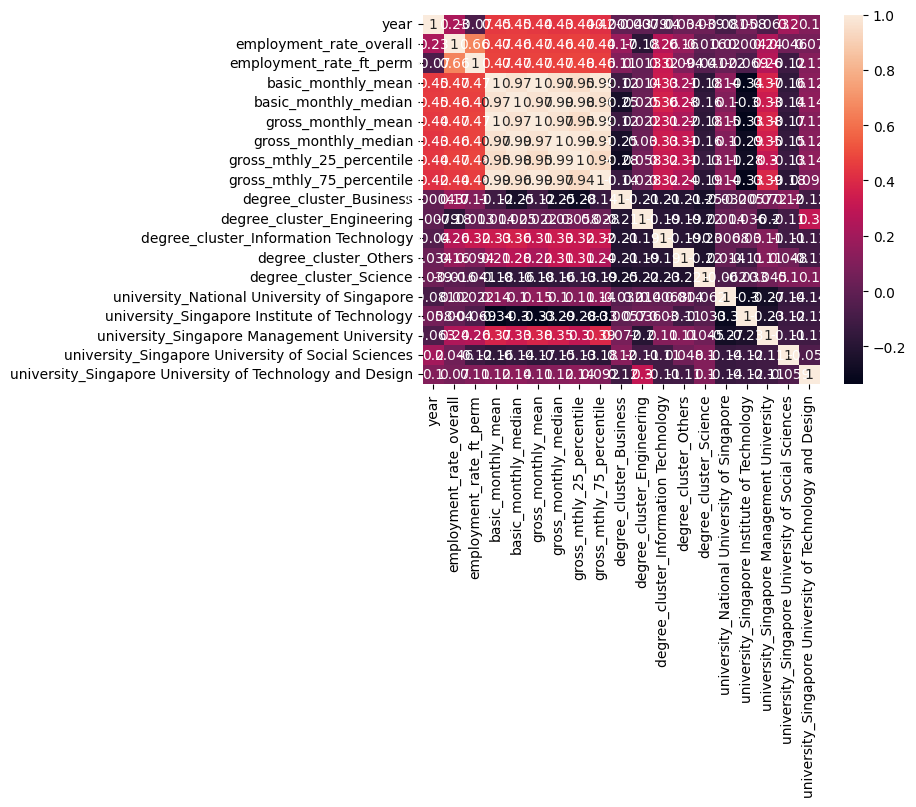

In [ ]:
df_ges3_corr = df_ges3.get(df_ges3.columns)

corrmat = df_ges3_corr.corr()

sns.heatmap(corrmat,annot = True)
plt.show()

Define Features and Target Variable

The target variable (what we want to predict) is basic_monthly_mean.

In [ ]:
# Define X (features) and y (target)
X = df_ges3.drop(columns=['basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median'])
y = df_ges3['basic_monthly_mean']

Split Data into Training & Testing Sets

To evaluate model performance, we split the data into 80% training and 20% testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (187, 15), Testing Set: (47, 15)


 Feature Scaling to improve model performance

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Selection

Model Selection (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate model performance
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")

Linear Regression Performance:
MAE: 57.15736850454407
MSE: 6207.411621479133
R² Score: 0.9864730114176946


Model Selection (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Performance:
MAE: 77.5708613336633
MSE: 11366.271165930133
R² Score: 0.9752309932608775


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'n_estimators': 200}


Model Selection (Decision Tree Regressor)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

Decision Tree Performance:
MAE: 77.5708613336633
MSE: 11366.271165930133
R² Score: 0.9752309932608775


#Model Evaluation

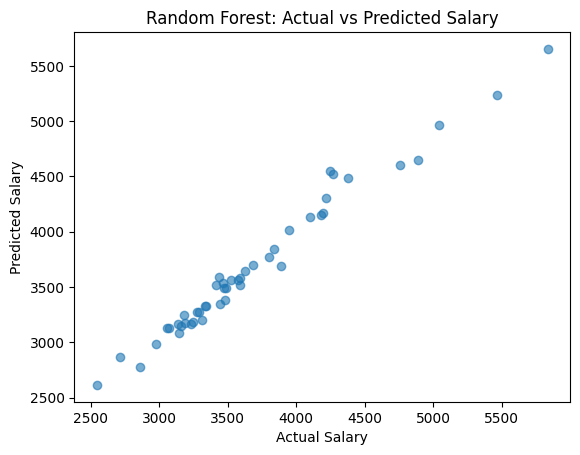

In [ ]:
import matplotlib.pyplot as plt

# Compare actual vs predicted salaries
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted Salary")
plt.show()

Model Evaluation

#AFTER

In [ ]:
#Extract NTU and NUS DataFrames respectively
df_clean_ges_ntu = df_clean_ges.loc[df_clean_ges['university'] == 'Nanyang Technological University']
df_clean_ges_nus = df_clean_ges.loc[df_clean_ges['university'] == 'National University of Singapore']

# Group by year and school cluster (college level)
df_ntu_grouped = df_clean_ges_ntu.groupby(['year', 'university', 'school']).mean(numeric_only=True).reset_index()
df_nus_grouped = df_clean_ges_nus.groupby(['year', 'university', 'school']).mean(numeric_only=True).reset_index()

In [ ]:
df_ntu_grouped.school.value_counts()

,count
school,
College of Business (Nanyang Business School),10
College of Engineering,10
National Institute of Education (NIE),10
"College of Humanities, Arts & Social Sciences",9
College of Sciences,7
Sports Science and Management,6
Lee Kong Chian School of Medicine,5
College of Science,3


In [ ]:
df_nus_grouped.school.value_counts()

,count
school,
Faculty of Arts & Social Sciences,10
Faculty of Law,10
Faculty of Science,10
NUS Business School,10
School of Computing,10
School of Design & Environment,9
Faculty of Dentistry,8
Faculty of Engineering,7
Yale-NUS College,6


In [ ]:
df_nus_grouped.dtypes

,0
year,int64
university,object
school,object
employment_rate_overall,float64
employment_rate_ft_perm,float64
basic_monthly_mean,float64
basic_monthly_median,float64
gross_monthly_mean,float64
gross_monthly_median,float64
gross_mthly_25_percentile,float64
